# - Plots -

# Imports

In [1]:
%autosave 60

Autosaving every 60 seconds


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.core.display import display, HTML
from bs4 import BeautifulSoup
import re
from unicodedata import normalize # https://towardsdatascience.com/difference-between-nfd-nfc-nfkd-and-nfkc-explained-with-python-code-e2631f96ae6c
import pickle
from dataclasses import dataclass, field
import seaborn as sn

/var/folders/pv/4lz7c47j4d901p0hrt6r1s500000gn/T/ipykernel_11359/525920234.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Read

## Original

Original JSON file from DW

In [3]:
inputdir = Path('../cleaning')
filename = Path('2020-01-01_2022-07-PORTUGUESE_BRAZIL.jsonl')
original = pd.read_json(inputdir/filename, lines=True)

In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11848 entries, 0 to 11847
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     11848 non-null  int64 
 1   language               11848 non-null  object
 2   name                   11848 non-null  object
 3   shortTitle             11848 non-null  object
 4   text                   11848 non-null  object
 5   teaser                 11848 non-null  object
 6   shortTeaser            11848 non-null  object
 7   kicker                 11787 non-null  object
 8   regions                11848 non-null  object
 9   keywords               11848 non-null  object
 10  keywordStrings         11848 non-null  object
 11  thematicFocusCategory  11837 non-null  object
 12  navigations            11848 non-null  object
 13  categories             11848 non-null  object
 14  departments            11848 non-null  object
 15  firstPublicationDat

In [5]:
original.head()

,id,language,name,shortTitle,text,teaser,shortTeaser,kicker,regions,keywords,...,contentDate,relatedAutoTopics,contentLinks,articles,isOpinion,contentAssociations,mainContentImageLink,images,externalLinks,topStory
0,54006424,PORTUGUESE_BRAZIL,"Covid-19, racismo e mau futebol derrubam presi...",Escândalos derrubam presidente do FC Schalke 04,<p>O presidente do FC Schalke 04 e proprietári...,Após sucessivas controvérsias e péssima campan...,"Proprietário do frigorífico Tönnies, centro de...",Alemanha,[],"[{'name': 'Tönnies'}, {'name': 'covid-19'}, {'...",...,2020-07-01T00:37:53.785Z,"[{'name': 'CPI da Pandemia'}, {'name': 'Covid-...","[{'name': 'Schalke 04, o declínio de uma lenda...","[{'name': 'Schalke 04, o declínio de uma lenda...",False,"[{'id': 53326534}, {'id': 53326552}, {'id': 53...","{'description': 'Clemens Tönnies, proprietário...","[{'name': 'S04 Schalke-Boss Clemens Tönnies'},...",[],False
1,54003004,PORTUGUESE_BRAZIL,Opinião: É o momento de Merkel definir o futur...,É o momento de Merkel definir o futuro da UE,"<figure class=""placeholder-image master_landsc...",Alemanha assume presidência rotativa da UE em ...,Enquanto se prepara para entregar o cargo em 2...,Opinião,[],"[{'name': 'Angela Merkel'}, {'name': 'União Eu...",...,2020-07-01T08:42:23.316Z,"[{'name': 'Angela Merkel'}, {'name': 'Comissão...","[{'name': ''}, {'name': 'Para Merkel, UE virou...","[{'name': 'Para Merkel, UE virou questão de co...",True,"[{'id': 53322481}, {'id': 53322886}, {'id': 53...","{'description': '""Este é o maior desafio que a...",[{'name': 'Brüssel | EU Gipfeltreffen: Angela ...,[],False
2,54009380,PORTUGUESE_BRAZIL,Telescópio espacial Hubble completa 30 anos,Telescópio espacial Hubble completa 30 anos,"<p>Na prática de exercícios físicos, o que é m...","James Webb, o telescópio sucessor, deve ficar ...","James Webb, o telescópio sucessor, deve ficar ...",,[],"[{'name': 'Hubble'}, {'name': 'telescópio'}, {...",...,2020-07-01T09:20:47.843Z,[{'name': 'Telescópio Hubble'}],[{'name': 'Hubble Weltraumteleskop'}],[],False,"[{'id': 53329407}, {'id': 53329408}, {'id': 53...",{'description': None},[{'name': 'Hubble Weltraumteleskop'}],[],False
3,54008153,PORTUGUESE_BRAZIL,Polícia de Hong Kong efetua primeiras prisões ...,Hong Kong efetua primeiras prisões com base em...,<p>Um homem que foi flagrado com uma bandeira ...,Protestos irrompem no território após autorida...,Protestos irrompem no território após autorida...,Ásia,[],"[{'name': 'Hong Kong'}, {'name': 'protestos em...",...,2020-07-01T09:44:01.046Z,"[{'name': 'Hong Kong'}, {'name': 'China'}]","[{'name': ''}, {'name': 'China aprova lei de s...",[{'name': 'China aprova lei de segurança nacio...,False,"[{'id': 53328442}, {'id': 53328443}, {'id': 53...",{'description': 'Polícia prende homem em prote...,[{'name': 'Hongkong | Pro-Democracy Proteste a...,[],False
4,54009331,PORTUGUESE_BRAZIL,Trump aprova plano para retirar 9.500 soldados...,Trump aprova plano para retirar 9.500 soldados...,"<p>O presidente dos Estados Unidos, Donald Tru...",Plano ainda precisa ser apresentado ao Congres...,Plano ainda precisa ser apresentado ao Congres...,Mundo,[],"[{'name': 'Alemanha'}, {'name': 'Otan'}, {'nam...",...,2020-07-01T10:22:04.158Z,"[{'name': 'Otan'}, {'name': 'Estados Unidos'},...","[{'name': 'O mês de junho em imagens'}, {'name...","[{'name': 'Militares americanos na Alemanha, u...",False,"[{'id': 53329506}, {'id': 53329508}, {'id': 53...",{'description': 'Base americana na Alemanha. T...,[{'name': 'Aus für US-Militär-Standorte Schwei...,[],False


## Results

Results after gender inference

In [5]:
inputdir = Path('../inference/')
filename = Path('portuguese_all_processed_articles_v2.csv')
df = pd.read_csv(inputdir/filename)

In [6]:
df

,id,name,input,prediction
0,54006424,Clemens Tönnies,TEXT1: Clemens Tönnies; TEXT2: O presidente d...,1.0
1,54006424,Gerald Asamoah,TEXT1: Gerald Asamoah; TEXT2: No mês de agost...,1.0
2,54006424,Hans Sarpei,"TEXT1: Hans Sarpei; TEXT2: No mês de agosto, ...",1.0
3,54006424,Cacau,"TEXT1: Cacau; TEXT2: No mês de agosto, durant...",1.0
4,54003004,Angela Merkel,TEXT1: Angela Merkel; TEXT2: Em meados de marc...,0.0
...,...,...,...,...
38987,54005845,Von der Leyen,TEXT1: Von der Leyen; TEXT2: Von der Leyen acr...,1.0
38988,54005845,Charles Michel,TEXT1: Charles Michel; TEXT2: O presidente do ...,1.0
38989,54005845,Gyde Jensen,"TEXT1: Gyde Jensen; TEXT2: Na Alemanha, a pres...",0.0
38990,54005845,Angela Merkel,"TEXT1: Angela Merkel; TEXT2: Na Alemanha, a pr...",0.0


# Remove unnecessary columns

In [9]:
df = df.drop(columns=['input'])

In [10]:
df

,id,name,prediction
0,54006424,Clemens Tönnies,1.0
1,54006424,Gerald Asamoah,1.0
2,54006424,Hans Sarpei,1.0
3,54006424,Cacau,1.0
4,54003004,Angela Merkel,0.0
...,...,...,...
38987,54005845,Von der Leyen,1.0
38988,54005845,Charles Michel,1.0
38989,54005845,Gyde Jensen,0.0
38990,54005845,Angela Merkel,0.0


In [11]:
cols = [
    'id',
    'kicker',
    'thematicFocusCategory',
    'navigations',
    'categories',
    'firstPublicationDate',
    'relatedAutoTopics',
    'isOpinion',
    'images'
]

original = original[cols]

In [12]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,relatedAutoTopics,isOpinion,images
0,54006424,Alemanha,{'name': 'Futebol'},"[{'name': 'Alemanha'}, {'name': 'NOTÍCIAS'}]","[{'name': 'Futebol'}, {'name': 'Saúde'}]",2020-07-01T00:32:15.020Z,"[{'name': 'CPI da Pandemia'}, {'name': 'Covid-...",False,"[{'name': 'S04 Schalke-Boss Clemens Tönnies'},..."
1,54003004,Opinião,{'name': 'Política'},[{'name': 'Mundo'}],"[{'name': 'Política'}, {'name': 'Economia'}]",2020-07-01T08:42:23.316Z,"[{'name': 'Angela Merkel'}, {'name': 'Comissão...",True,[{'name': 'Brüssel | EU Gipfeltreffen: Angela ...
2,54009380,,{'name': 'Ciência'},[{'name': 'NOTÍCIAS'}],[{'name': 'Ciência'}],2020-07-01T09:20:47.843Z,[{'name': 'Telescópio Hubble'}],False,[{'name': 'Hubble Weltraumteleskop'}]
3,54008153,Ásia,{'name': 'Política'},[{'name': 'Mundo'}],[{'name': 'Política'}],2020-07-01T09:44:01.046Z,"[{'name': 'Hong Kong'}, {'name': 'China'}]",False,[{'name': 'Hongkong | Pro-Democracy Proteste a...
4,54009331,Mundo,{'name': 'Política'},"[{'name': 'Mundo'}, {'name': 'Alemanha'}]",[{'name': 'Política'}],2020-07-01T10:22:04.158Z,"[{'name': 'Otan'}, {'name': 'Estados Unidos'},...",False,[{'name': 'Aus für US-Militär-Standorte Schwei...


# Format the riginal data

## Tests

In [7]:
original.iloc[0].thematicFocusCategory

{'name': 'Futebol'}

In [72]:
tmp = original.iloc[0].thematicFocusCategory

In [73]:
type(tmp)

dict

In [52]:
type(tmp[0])

dict

In [49]:
original.iloc[0].departments

[{'name': 'Brasilianisch'}]

In [50]:
tmp = original.iloc[0].departments

In [53]:
type(tmp)

list

In [52]:
type(tmp[0])

dict

In [56]:
tmp = original.iloc[0].firstPublicationDate

In [57]:
type(tmp)

str

In [58]:
tmp = original.iloc[0].isOpinion

In [59]:
type(tmp)

numpy.bool_

In [8]:
def parse_dics_and_list_of_dics(x:list)->list:
    """Take a either a dictionary or list of dicionaries or `None`and return a list of strings with significant values""" 
    keys = []
    values = []
    if isinstance(x,list):
        for dic in x:
            if dic is not None:
                for (k,v) in dic.items():
                    keys.append(k)
                    values.append(v)
    elif isinstance(x,dict):
        for (k,v) in x.items():
            keys.append(k)
            values.append(v)
    elif x is None:
        values = ['']
    else:
        raise TypeError(f'Received a `x type {type(x)}')
    return values

In [13]:
original.iloc[0:4].thematicFocusCategory.apply(parse_dics_and_list_of_dics)

0     [Futebol]
1    [Política]
2     [Ciência]
3    [Política]
Name: thematicFocusCategory, dtype: object

In [13]:
tmp = original.iloc[0:4].thematicFocusCategory.apply(parse_dics_and_list_of_dics)

In [14]:
tmp

0     [Futebol]
1    [Política]
2     [Ciência]
3    [Política]
Name: thematicFocusCategory, dtype: object

In [80]:
tmp[0]

['Futebol']

## Test the function

In [14]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,relatedAutoTopics,isOpinion,images
0,54006424,Alemanha,{'name': 'Futebol'},"[{'name': 'Alemanha'}, {'name': 'NOTÍCIAS'}]","[{'name': 'Futebol'}, {'name': 'Saúde'}]",2020-07-01T00:32:15.020Z,"[{'name': 'CPI da Pandemia'}, {'name': 'Covid-...",False,"[{'name': 'S04 Schalke-Boss Clemens Tönnies'},..."
1,54003004,Opinião,{'name': 'Política'},[{'name': 'Mundo'}],"[{'name': 'Política'}, {'name': 'Economia'}]",2020-07-01T08:42:23.316Z,"[{'name': 'Angela Merkel'}, {'name': 'Comissão...",True,[{'name': 'Brüssel | EU Gipfeltreffen: Angela ...
2,54009380,,{'name': 'Ciência'},[{'name': 'NOTÍCIAS'}],[{'name': 'Ciência'}],2020-07-01T09:20:47.843Z,[{'name': 'Telescópio Hubble'}],False,[{'name': 'Hubble Weltraumteleskop'}]
3,54008153,Ásia,{'name': 'Política'},[{'name': 'Mundo'}],[{'name': 'Política'}],2020-07-01T09:44:01.046Z,"[{'name': 'Hong Kong'}, {'name': 'China'}]",False,[{'name': 'Hongkong | Pro-Democracy Proteste a...
4,54009331,Mundo,{'name': 'Política'},"[{'name': 'Mundo'}, {'name': 'Alemanha'}]",[{'name': 'Política'}],2020-07-01T10:22:04.158Z,"[{'name': 'Otan'}, {'name': 'Estados Unidos'},...",False,[{'name': 'Aus für US-Militär-Standorte Schwei...


In [15]:
original.thematicFocusCategory.apply(parse_dics_and_list_of_dics)

0         [Futebol]
1        [Política]
2         [Ciência]
3        [Política]
4        [Política]
            ...    
11843     [Cultura]
11844    [Política]
11845    [Política]
11846       [Saúde]
11847       [Saúde]
Name: thematicFocusCategory, Length: 11848, dtype: object

In [16]:
original.navigations.apply(parse_dics_and_list_of_dics)

0        [Alemanha, NOTÍCIAS]
1                     [Mundo]
2                  [NOTÍCIAS]
3                     [Mundo]
4           [Mundo, Alemanha]
                 ...         
11843              [Alemanha]
11844                 [Mundo]
11845                [Brasil]
11846                [Brasil]
11847              [NOTÍCIAS]
Name: navigations, Length: 11848, dtype: object

In [17]:
original.categories.apply(parse_dics_and_list_of_dics)

0            [Futebol, Saúde]
1        [Política, Economia]
2                   [Ciência]
3                  [Política]
4                  [Política]
                 ...         
11843               [Cultura]
11844              [Política]
11845              [Política]
11846                 [Saúde]
11847       [Saúde, Política]
Name: categories, Length: 11848, dtype: object

In [19]:
original.relatedAutoTopics.apply(parse_dics_and_list_of_dics)

0                              [CPI da Pandemia, Covid-19]
1        [Angela Merkel, Comissão Europeia, União Europ...
2                                      [Telescópio Hubble]
3                                       [Hong Kong, China]
4                     [Otan, Estados Unidos, Donald Trump]
                               ...                        
11843            [Berlim, Nazismo, Segunda Guerra Mundial]
11844    [ONU, Estados Unidos, Organização das Nações U...
11845                    [Jair Bolsonaro, CPI da Pandemia]
11846              [Sars-Cov-2, CPI da Pandemia, Covid-19]
11847                                                   []
Name: relatedAutoTopics, Length: 11848, dtype: object

In [20]:
original.images.apply(parse_dics_and_list_of_dics)

0        [S04 Schalke-Boss Clemens Tönnies, Deutschland...
1              [Brüssel | EU Gipfeltreffen: Angela Merkel]
2                                [Hubble Weltraumteleskop]
3        [Hongkong | Pro-Democracy Proteste am Tag des ...
4        [Aus für US-Militär-Standorte Schweinfurt und ...
                               ...                        
11843    [Ausstellung Enthüllt. Berlin und seine Denkmä...
11844                         [Hongkong Sicherheitsgesetz]
11845                  [Carlos Alberto Decotelli da Silva]
11846                            [Coronavirus I Brasilien]
11847                                                   []
Name: images, Length: 11848, dtype: object

## Apply the function

In [21]:
original.thematicFocusCategory = original.thematicFocusCategory.apply(parse_dics_and_list_of_dics)
original.navigations = original.navigations.apply(parse_dics_and_list_of_dics)
original.categories = original.categories.apply(parse_dics_and_list_of_dics)
original.relatedAutoTopics = original.relatedAutoTopics.apply(parse_dics_and_list_of_dics)
original.images = original.images.apply(parse_dics_and_list_of_dics)

In [22]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,relatedAutoTopics,isOpinion,images
0,54006424,Alemanha,[Futebol],"[Alemanha, NOTÍCIAS]","[Futebol, Saúde]",2020-07-01T00:32:15.020Z,"[CPI da Pandemia, Covid-19]",False,"[S04 Schalke-Boss Clemens Tönnies, Deutschland..."
1,54003004,Opinião,[Política],[Mundo],"[Política, Economia]",2020-07-01T08:42:23.316Z,"[Angela Merkel, Comissão Europeia, União Europ...",True,[Brüssel | EU Gipfeltreffen: Angela Merkel]
2,54009380,,[Ciência],[NOTÍCIAS],[Ciência],2020-07-01T09:20:47.843Z,[Telescópio Hubble],False,[Hubble Weltraumteleskop]
3,54008153,Ásia,[Política],[Mundo],[Política],2020-07-01T09:44:01.046Z,"[Hong Kong, China]",False,[Hongkong | Pro-Democracy Proteste am Tag des ...
4,54009331,Mundo,[Política],"[Mundo, Alemanha]",[Política],2020-07-01T10:22:04.158Z,"[Otan, Estados Unidos, Donald Trump]",False,[Aus für US-Militär-Standorte Schweinfurt und ...


In [ ]:
original.iloc[2].kicker

''

## Images to numbers

In [26]:
original.images.apply(len)

0        2
1        1
2        1
3        1
4        1
        ..
11843    2
11844    1
11845    1
11846    1
11847    0
Name: images, Length: 11848, dtype: int64

In [27]:
original.images = original.images.apply(len)

In [28]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,relatedAutoTopics,isOpinion,images
0,54006424,Alemanha,[Futebol],"[Alemanha, NOTÍCIAS]","[Futebol, Saúde]",2020-07-01T00:32:15.020Z,"[CPI da Pandemia, Covid-19]",False,2
1,54003004,Opinião,[Política],[Mundo],"[Política, Economia]",2020-07-01T08:42:23.316Z,"[Angela Merkel, Comissão Europeia, União Europ...",True,1
2,54009380,,[Ciência],[NOTÍCIAS],[Ciência],2020-07-01T09:20:47.843Z,[Telescópio Hubble],False,1
3,54008153,Ásia,[Política],[Mundo],[Política],2020-07-01T09:44:01.046Z,"[Hong Kong, China]",False,1
4,54009331,Mundo,[Política],"[Mundo, Alemanha]",[Política],2020-07-01T10:22:04.158Z,"[Otan, Estados Unidos, Donald Trump]",False,1


## Datatimes

In [29]:
original.firstPublicationDate.astype('datetime64[ns]')

0       2020-07-01 00:32:15.020
1       2020-07-01 08:42:23.316
2       2020-07-01 09:20:47.843
3       2020-07-01 09:44:01.046
4       2020-07-01 10:22:04.158
                  ...          
11843   2020-06-30 19:42:13.758
11844   2020-06-30 20:05:06.610
11845   2020-06-30 20:38:26.413
11846   2020-06-30 22:25:40.885
11847   2020-06-30 22:56:07.943
Name: firstPublicationDate, Length: 11848, dtype: datetime64[ns]

In [30]:
original.firstPublicationDate = original.firstPublicationDate.astype('datetime64[ns]')

In [35]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,relatedAutoTopics,isOpinion,images
0,54006424,Alemanha,[Futebol],"[Alemanha, NOTÍCIAS]","[Futebol, Saúde]",2020-07-01 00:32:15.020,"[CPI da Pandemia, Covid-19]",False,2
1,54003004,Opinião,[Política],[Mundo],"[Política, Economia]",2020-07-01 08:42:23.316,"[Angela Merkel, Comissão Europeia, União Europ...",True,1
2,54009380,,[Ciência],[NOTÍCIAS],[Ciência],2020-07-01 09:20:47.843,[Telescópio Hubble],False,1
3,54008153,Ásia,[Política],[Mundo],[Política],2020-07-01 09:44:01.046,"[Hong Kong, China]",False,1
4,54009331,Mundo,[Política],"[Mundo, Alemanha]",[Política],2020-07-01 10:22:04.158,"[Otan, Estados Unidos, Donald Trump]",False,1


## Expand lists

### Drop columns

In [39]:
original = original.drop(columns=['relatedAutoTopics'])

In [40]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Alemanha,[Futebol],"[Alemanha, NOTÍCIAS]","[Futebol, Saúde]",2020-07-01 00:32:15.020,False,2
1,54003004,Opinião,[Política],[Mundo],"[Política, Economia]",2020-07-01 08:42:23.316,True,1
2,54009380,,[Ciência],[NOTÍCIAS],[Ciência],2020-07-01 09:20:47.843,False,1
3,54008153,Ásia,[Política],[Mundo],[Política],2020-07-01 09:44:01.046,False,1
4,54009331,Mundo,[Política],"[Mundo, Alemanha]",[Política],2020-07-01 10:22:04.158,False,1


### Expand

In [43]:
original.explode('navigations').explode('thematicFocusCategory').explode('categories').explode('categories')

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
0,54006424,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
0,54006424,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
0,54006424,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
1,54003004,Opinião,Política,Mundo,Política,2020-07-01 08:42:23.316,True,1
...,...,...,...,...,...,...,...,...
11844,54005845,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
11845,54006072,Brasil,Política,Brasil,Política,2020-06-30 20:38:26.413,False,1
11846,54006316,Coronavírus,Saúde,Brasil,Saúde,2020-06-30 22:25:40.885,False,1
11847,54006338,None,Saúde,NOTÍCIAS,Saúde,2020-06-30 22:56:07.943,False,0


In [45]:
original = original.explode('navigations').explode('thematicFocusCategory').explode('categories').explode('categories')

In [46]:
original.head()

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
0,54006424,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
0,54006424,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
0,54006424,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
1,54003004,Opinião,Política,Mundo,Política,2020-07-01 08:42:23.316,True,1


### Index

In [49]:
original = original.reset_index(drop=True)

In [57]:
original.head(30)

,id,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
1,54006424,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
2,54006424,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
3,54006424,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
4,54003004,Opinião,Política,Mundo,Política,2020-07-01 08:42:23.316,True,1
5,54003004,Opinião,Política,Mundo,Economia,2020-07-01 08:42:23.316,True,1
6,54009380,,Ciência,NOTÍCIAS,Ciência,2020-07-01 09:20:47.843,False,1
7,54008153,Ásia,Política,Mundo,Política,2020-07-01 09:44:01.046,False,1
8,54009331,Mundo,Política,Mundo,Política,2020-07-01 10:22:04.158,False,1
9,54009331,Mundo,Política,Alemanha,Política,2020-07-01 10:22:04.158,False,1


### Save

In [51]:
outputdir = Path.cwd()
filename = 'portuguese_DWdata_formatted.csv'
original.to_csv(outputdir/filename, index=False)

# Add gender column

In [ ]:
df.prediction.value_counts()

1.0    29885
0.0     9107
Name: prediction, dtype: int64

In [ ]:
df.prediction.value_counts()

1.0    52980
0.0    16699
Name: prediction, dtype: int64

In [ ]:
1-9107/(29885+9107)

0.7664392695937629

In [53]:
df['gender'] = df.prediction.apply(lambda x: {0.0:'female',1.0:'male'}[x])

In [161]:
df.gender.value_counts()

male      52980
female    16699
Name: gender, dtype: int64

In [ ]:
df.head(30)

,id,name,prediction,gender,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
1,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
2,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
3,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
4,54006424,Gerald Asamoah,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
...,...,...,...,...,...,...,...,...,...,...,...
69674,54005845,Von der Leyen,1.0,male,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
69675,54005845,Charles Michel,1.0,male,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
69676,54005845,Gyde Jensen,0.0,female,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
69677,54005845,Angela Merkel,0.0,female,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1


# merge

In [58]:
df_old = df.copy()

In [59]:
df = pd.merge(df,original, on='id', how='inner')

In [61]:
df.head(30)

,id,name,prediction,gender,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
1,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
2,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
3,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
4,54006424,Gerald Asamoah,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
5,54006424,Gerald Asamoah,1.0,male,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
6,54006424,Gerald Asamoah,1.0,male,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
7,54006424,Gerald Asamoah,1.0,male,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
8,54006424,Hans Sarpei,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
9,54006424,Hans Sarpei,1.0,male,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2


In [63]:
df

,id,name,prediction,gender,kicker,thematicFocusCategory,navigations,categories,firstPublicationDate,isOpinion,images
0,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
1,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,Alemanha,Saúde,2020-07-01 00:32:15.020,False,2
2,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,NOTÍCIAS,Futebol,2020-07-01 00:32:15.020,False,2
3,54006424,Clemens Tönnies,1.0,male,Alemanha,Futebol,NOTÍCIAS,Saúde,2020-07-01 00:32:15.020,False,2
4,54006424,Gerald Asamoah,1.0,male,Alemanha,Futebol,Alemanha,Futebol,2020-07-01 00:32:15.020,False,2
...,...,...,...,...,...,...,...,...,...,...,...
69674,54005845,Von der Leyen,1.0,male,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
69675,54005845,Charles Michel,1.0,male,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
69676,54005845,Gyde Jensen,0.0,female,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1
69677,54005845,Angela Merkel,0.0,female,Mundo,Política,Mundo,Política,2020-06-30 20:05:06.610,False,1


## Save

In [64]:
outputdir = Path.cwd()
filename = Path('portuguese_DWdata_formatted_with_names_and_gender.csv')
df.to_csv(outputdir/filename, index=False)

# Plots

In [88]:
col = 'thematicFocusCategory'
cols = ['id', 'name', 'gender', col]
df_tmp = df[cols].drop_duplicates().reset_index(drop=True)

In [89]:
df_tmp.head()

,id,name,gender,thematicFocusCategory
0,54006424,Clemens Tönnies,male,Futebol
1,54006424,Gerald Asamoah,male,Futebol
2,54006424,Hans Sarpei,male,Futebol
3,54006424,Cacau,male,Futebol
4,54003004,Angela Merkel,female,Política


In [87]:
df_tmp.drop_duplicates().head()

,id,name,gender,thematicFocusCategory
0,54006424,Clemens Tönnies,male,Futebol
4,54006424,Gerald Asamoah,male,Futebol
8,54006424,Hans Sarpei,male,Futebol
12,54006424,Cacau,male,Futebol
16,54003004,Angela Merkel,female,Política


## thematicFocusCategory

In [ ]:
col = 'thematicFocusCategory'
cols = ['id', 'name', 'gender', col]
df_tmp = df[cols].drop_duplicates().reset_index(drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Arquitetura'),
  Text(1, 0, 'Arte'),
  Text(2, 0, 'Carros e mobilidade'),
  Text(3, 0, 'Catástrofe'),
  Text(4, 0, 'Ciência'),
  Text(5, 0, 'Clima'),
  Text(6, 0, 'Comércio'),
  Text(7, 0, 'Conflitos'),
  Text(8, 0, 'Corrupção'),
  Text(9, 0, 'Criminalidade'),
  Text(10, 0, 'Cultura'),
  Text(11, 0, 'Dança'),
  Text(12, 0, 'Direitos humanos'),
  Text(13, 0, 'Diversidade'),
  Text(14, 0, 'Economia'),
  Text(15, 0, 'Educação'),
  Text(16, 0, 'Esporte'),
  Text(17, 0, 'Estado de Direito'),
  Text(18, 0, 'Filme'),
  Text(19, 0, 'Futebol'),
  Text(20, 0, 'História'),
  Text(21, 0, 'Igualdade de direitos'),
  Text(22, 0, 'Inovação'),
  Text(23, 0, 'Leis e Justiça'),
  Text(24, 0, 'Liberdade de expressão'),
  Text(25, 0, 'Liberdade de imprensa'),
  Text(26, 0, 'Literatura'),
  Text(27, 0,

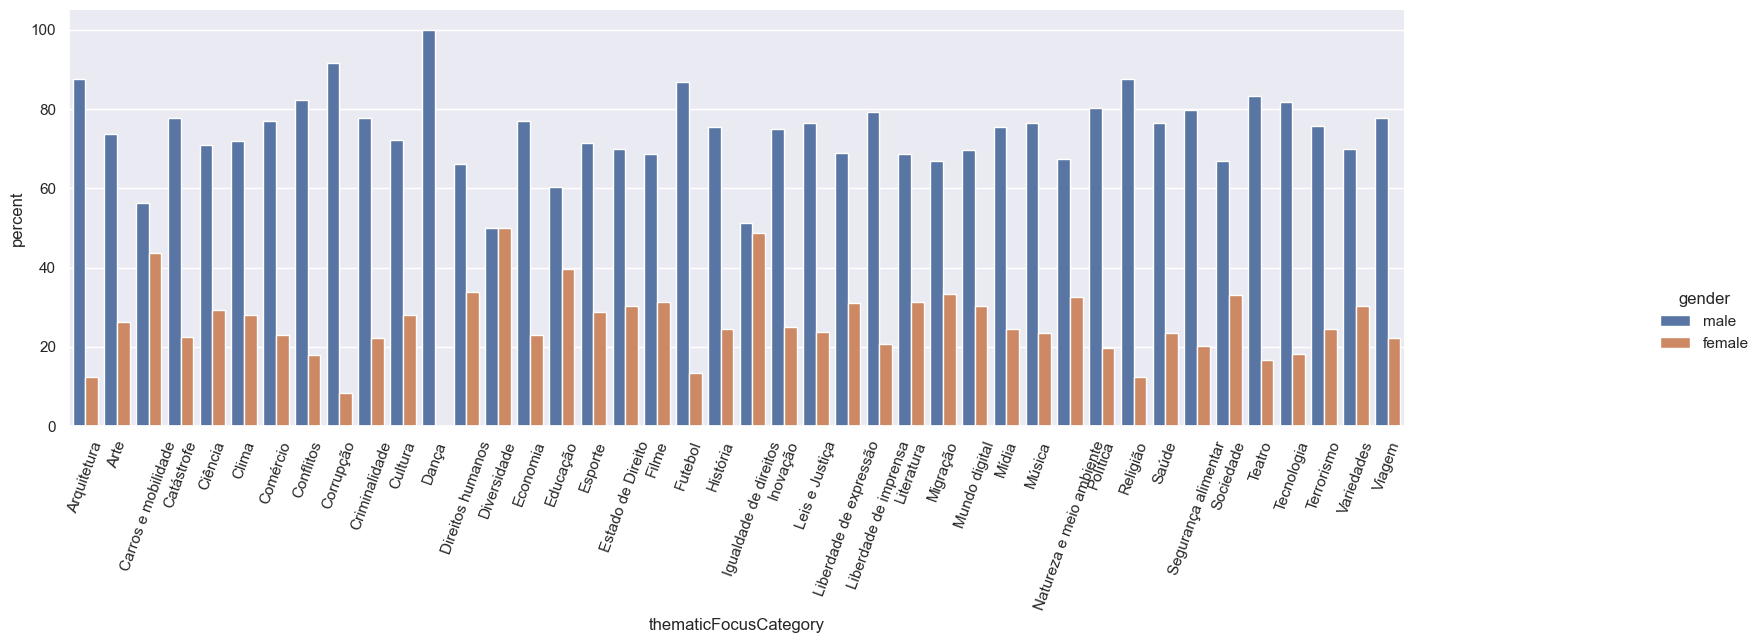

In [139]:
x,y = 'thematicFocusCategory', 'gender'
df_tmp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sn.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
fig = plt.gcf()
fig.set_figwidth(20)
plt.xticks(rotation=70)

## navigations

In [141]:
col = 'navigations'
cols = ['id', 'name', 'gender', col]
df_tmp = df[cols].drop_duplicates().reset_index(drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'Alemanha'),
  Text(1, 0, 'América Latina'),
  Text(2, 0, 'Brasil'),
  Text(3, 0, 'Calendário Histórico'),
  Text(4, 0, 'Ciência e Saúde'),
  Text(5, 0, 'Colunas'),
  Text(6, 0, 'Cultura'),
  Text(7, 0, 'Economia'),
  Text(8, 0, 'Eleição na Alemanha'),
  Text(9, 0, 'Eleições nos EUA'),
  Text(10, 0, 'Especial'),
  Text(11, 0, 'Esporte'),
  Text(12, 0, 'Europa'),
  Text(13, 0, 'História'),
  Text(14, 0, 'Jogos Olímpicos'),
  Text(15, 0, 'Meio Ambiente'),
  Text(16, 0, 'Mundo'),
  Text(17, 0, 'NOTÍCIAS'),
  Text(18, 0, 'NRS-Import'),
  Text(19, 0, 'Política'),
  Text(20, 0, 'Reunificação alemã'),
  Text(21, 0, 'Segunda Guerra Mundial'),
  Text(22, 0, 'Turismo')])

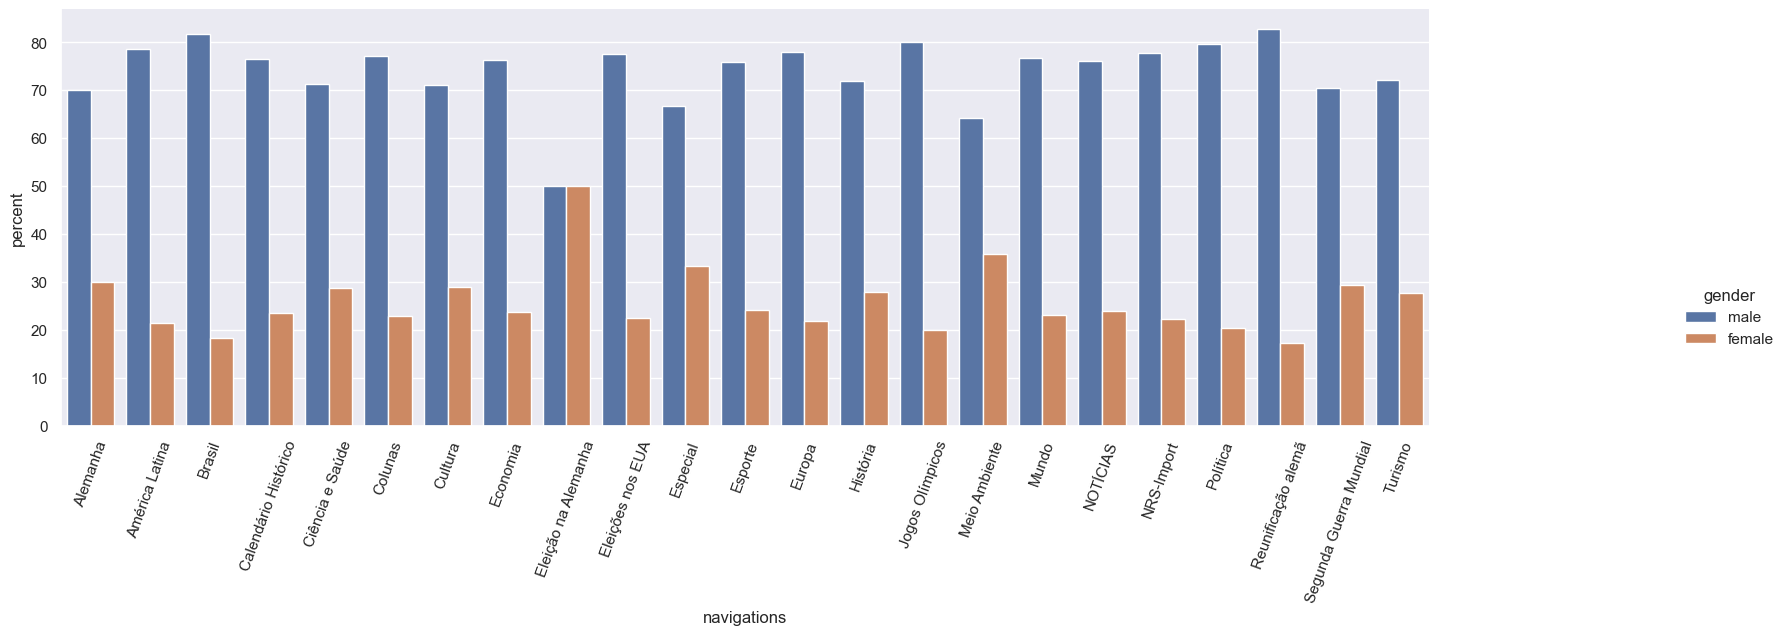

In [142]:
x,y = 'navigations', 'gender'
df_tmp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sn.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
fig = plt.gcf()
fig.set_figwidth(20)
plt.xticks(rotation=70)

## kicker

**Too many categories to plot**

## categories

In [143]:
col = 'categories'
cols = ['id', 'name', 'gender', col]
df_tmp = df[cols].drop_duplicates().reset_index(drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 [Text(0, 0, 'Arquitetura'),
  Text(1, 0, 'Arte'),
  Text(2, 0, 'Carros e mobilidade'),
  Text(3, 0, 'Catástrofe'),
  Text(4, 0, 'Ciência'),
  Text(5, 0, 'Clima'),
  Text(6, 0, 'Comércio'),
  Text(7, 0, 'Conflitos'),
  Text(8, 0, 'Corrupção'),
  Text(9, 0, 'Criminalidade'),
  Text(10, 0, 'Cultura'),
  Text(11, 0, 'Dança'),
  Text(12, 0, 'Direitos humanos'),
  Text(13, 0, 'Diversidade'),
  Text(14, 0, 'Economia'),
  Text(15, 0, 'Educação'),
  Text(16, 0, 'Esporte'),
  Text(17, 0, 'Estado de Direito'),
  Text(18, 0, 'Filme'),
  Text(19, 0, 'Futebol'),
  Text(20, 0, 'Globalização'),
  Text(21, 0, 'História'),
  Text(22, 0, 'Igualdade de direitos'),
  Text(23, 0, 'Inovação'),
  Text(24, 0, 'Leis e Justiça'),
  Text(25, 0, 'Liberdade de expressão'),
  Text(26, 0, 'Liberdade de imprensa'),

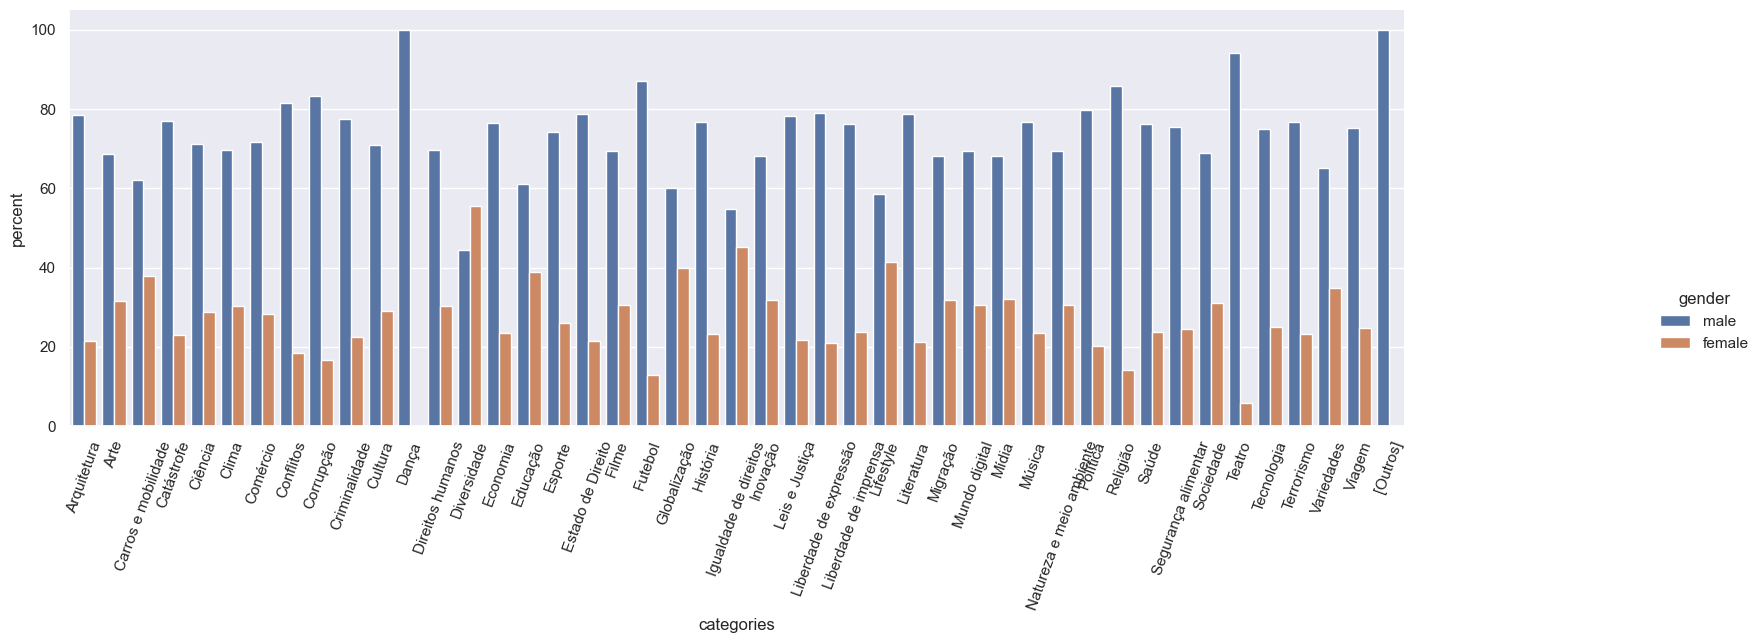

In [144]:
x,y = 'categories', 'gender'
df_tmp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sn.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
fig = plt.gcf()
fig.set_figwidth(20)
plt.xticks(rotation=70)

## isOpinion

In [148]:
col = 'isOpinion'
cols = ['id', 'name', 'gender', col]
df_tmp = df[cols].drop_duplicates().reset_index(drop=True)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

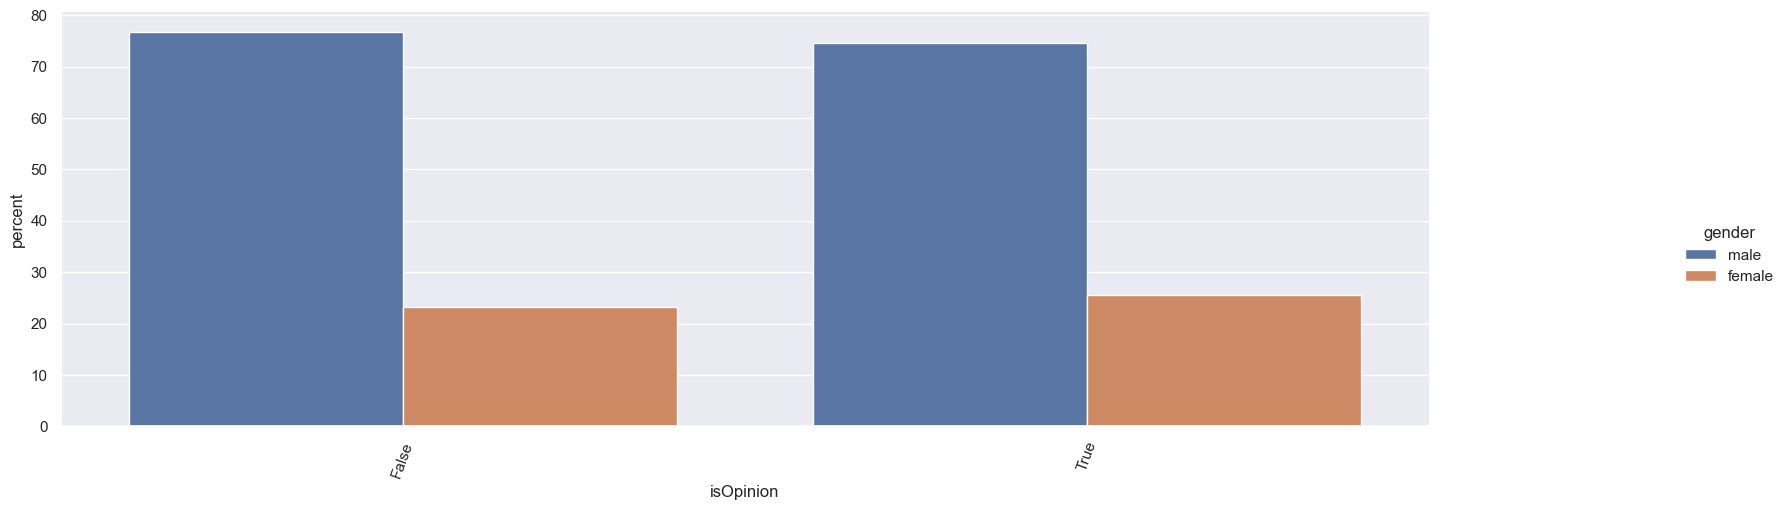

In [149]:
x,y = 'isOpinion', 'gender'
df_tmp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sn.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
fig = plt.gcf()
fig.set_figwidth(20)
plt.xticks(rotation=70)

## images

In [168]:
col = 'images'
cols = ['id', 'name', 'gender', col]
df_tmp = df[cols].drop_duplicates().reset_index(drop=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '11'),
  Text(10, 0, '14')])

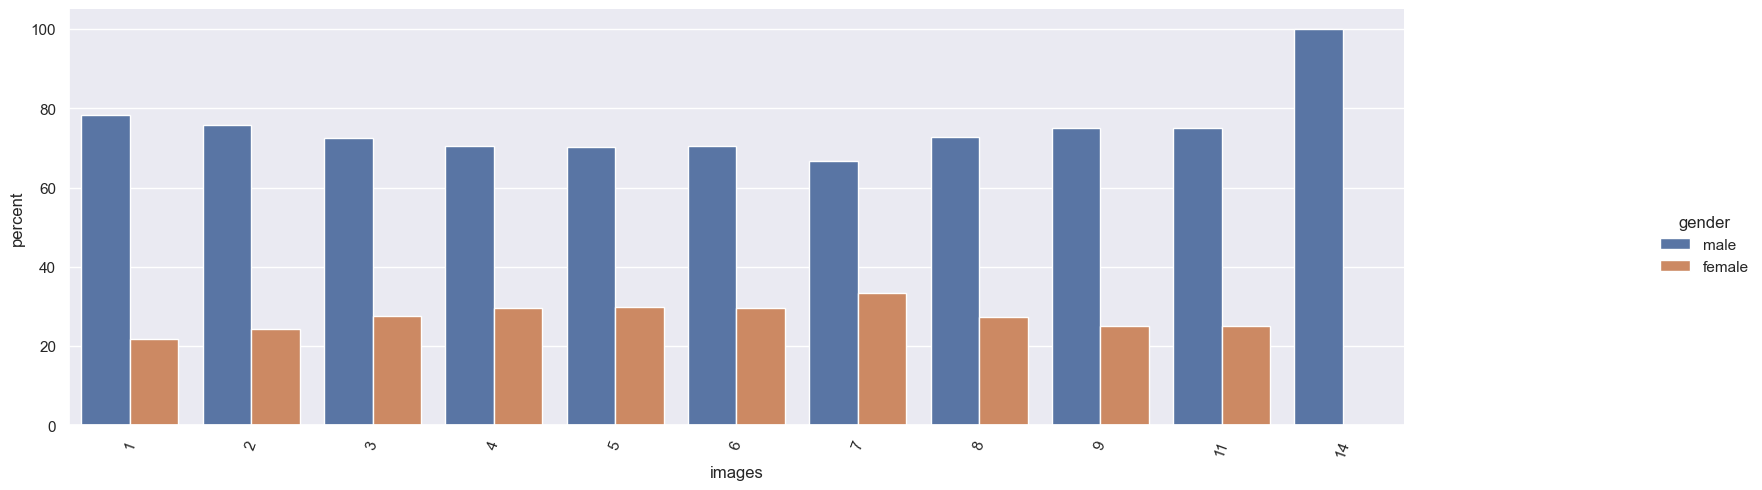

In [169]:
x,y = 'images', 'gender'
df_tmp.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index().pipe((sn.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
fig = plt.gcf()
fig.set_figwidth(20)
plt.xticks(rotation=70)

In [159]:
plt.close()